# Вступ до ймовірності та статистики
У цьому зошиті ми розглянемо деякі з концепцій, які ми обговорювали раніше. Багато понять з ймовірності та статистики добре представлені в основних бібліотеках для обробки даних у Python, таких як `numpy` та `pandas`.


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Випадкові змінні та розподіли
Почнемо з вибірки з 30 значень із рівномірного розподілу від 0 до 9. Ми також обчислимо середнє значення та дисперсію.


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


Щоб візуально оцінити, скільки різних значень є у вибірці, ми можемо побудувати **гістограму**:


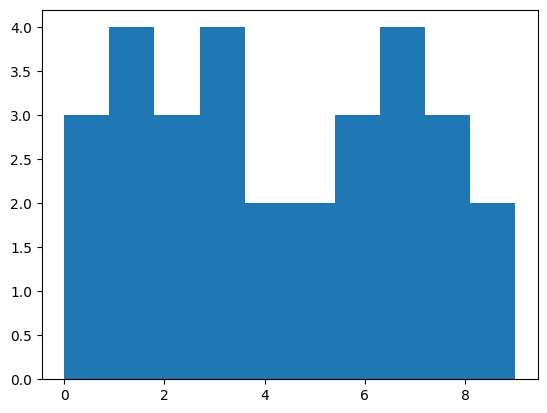

In [119]:
plt.hist(sample)
plt.show()

## Аналіз реальних даних

Середнє значення та дисперсія є дуже важливими при аналізі даних з реального світу. Давайте завантажимо дані про бейсболістів із [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


Ми використовуємо пакет під назвою [**Pandas**](https://pandas.pydata.org/) для аналізу даних. Ми детальніше поговоримо про Pandas і роботу з даними в Python пізніше в цьому курсі.

Давайте обчислимо середні значення для віку, зросту та ваги:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

Тепер зосередимося на зрості та обчислимо стандартне відхилення і дисперсію:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


На додаток до середнього, має сенс розглянути медіанне значення та квартилі. Їх можна візуалізувати за допомогою **коробчатої діаграми**:


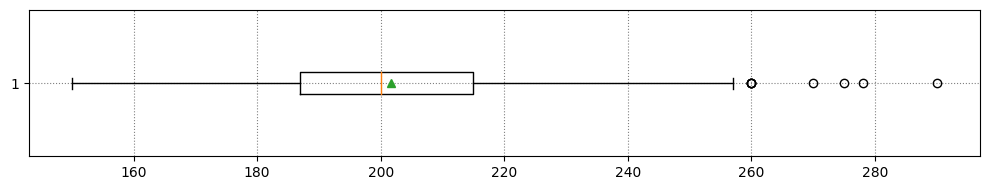

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

Ми також можемо створювати коробкові діаграми для підмножин нашого набору даних, наприклад, згрупованих за роллю гравця.


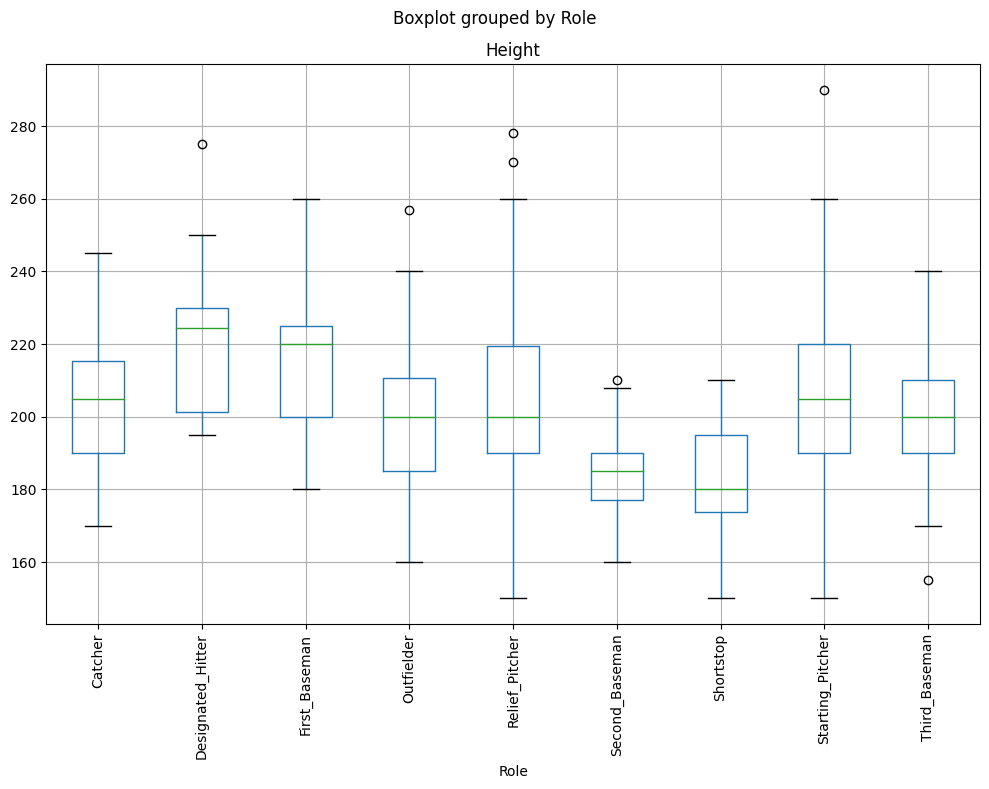

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Примітка**: Ця діаграма показує, що в середньому зріст перших базових гравців вищий, ніж зріст других базових гравців. Пізніше ми дізнаємося, як можна більш формально перевірити цю гіпотезу, а також як продемонструвати, що наші дані є статистично значущими для підтвердження цього.

Вік, зріст і вага — це всі неперервні випадкові величини. Як ви думаєте, який у них розподіл? Хороший спосіб дізнатися — побудувати гістограму значень:


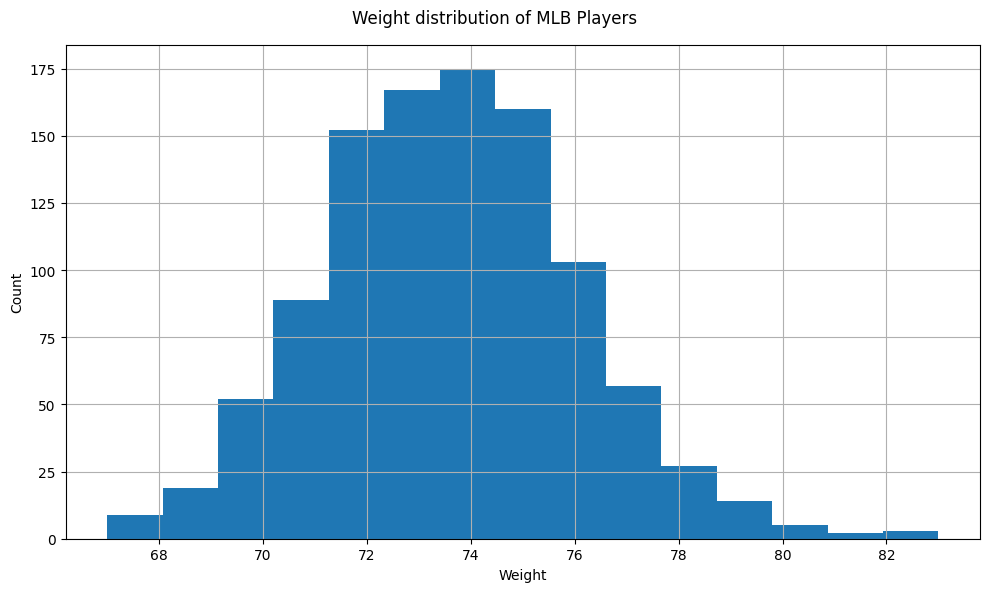

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Нормальний розподіл

Давайте створимо штучну вибірку ваг, яка відповідає нормальному розподілу з таким самим середнім значенням і дисперсією, як у наших реальних даних:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

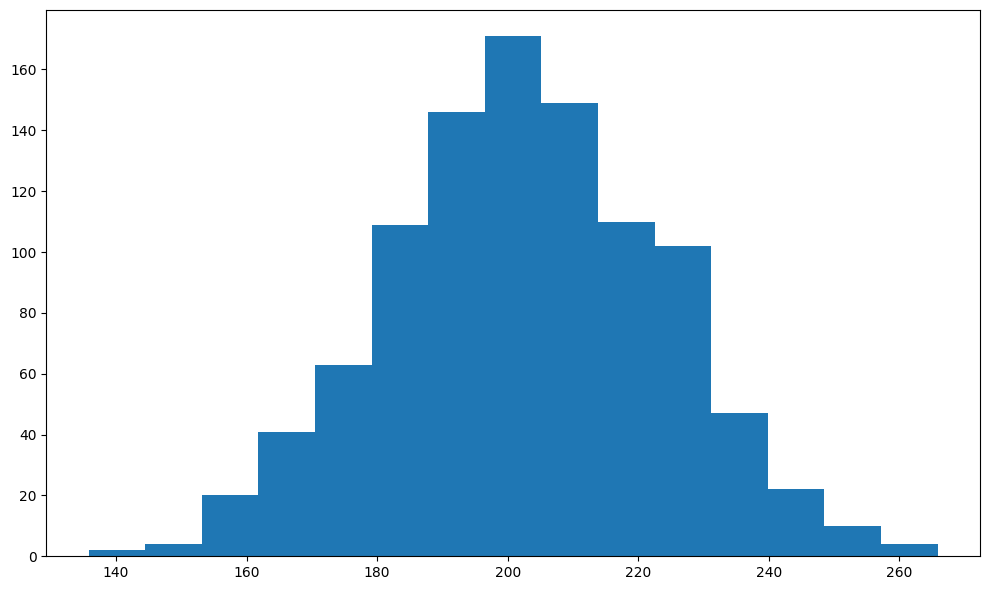

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

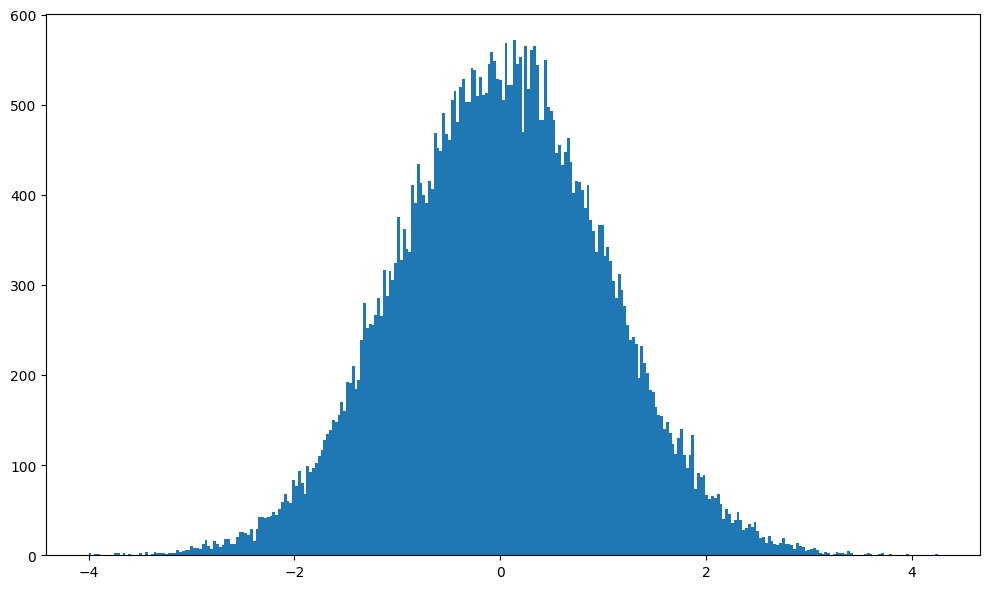

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Оскільки більшість значень у реальному житті мають нормальний розподіл, ми не повинні використовувати генератор випадкових чисел з рівномірним розподілом для створення вибіркових даних. Ось що відбувається, якщо ми спробуємо згенерувати ваги з рівномірним розподілом (згенерованим за допомогою `np.random.rand`):


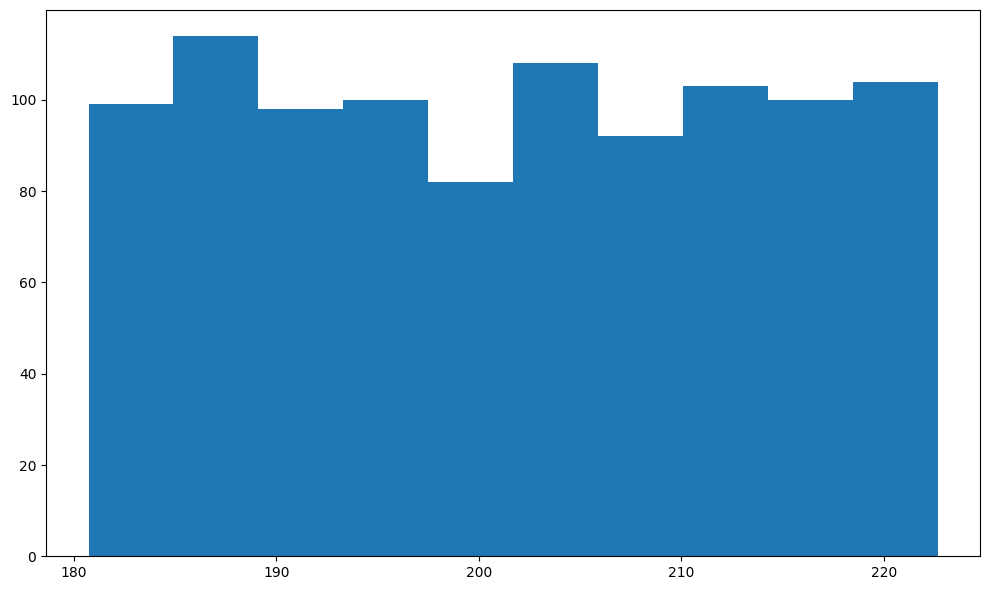

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Довірчі інтервали

Давайте тепер обчислимо довірчі інтервали для ваги та зросту бейсболістів. Ми використаємо код [з цієї дискусії на stackoverflow](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## Перевірка гіпотез

Давайте розглянемо різні ролі в нашому наборі даних про бейсболістів:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


Ми бачимо, що інтервали не перетинаються.

Статистично більш правильний спосіб довести гіпотезу — використати **t-тест Стьюдента**:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


Два значення, які повертає функція `ttest_ind`, це:  
* p-значення можна розглядати як ймовірність того, що два розподіли мають однакове середнє значення. У нашому випадку воно дуже низьке, що свідчить про вагомі докази того, що перші базові гравці вищі.  
* t-значення є проміжним значенням нормалізованої різниці середніх, яке використовується в t-тесті, і його порівнюють із пороговим значенням для заданого рівня довіри.  


## Імітація нормального розподілу за допомогою теореми центральної граничної

Псевдовипадковий генератор у Python створений для отримання рівномірного розподілу. Якщо ми хочемо створити генератор для нормального розподілу, можемо скористатися теоремою центральної граничної. Щоб отримати значення з нормального розподілу, ми просто обчислимо середнє значення вибірки, згенерованої рівномірно.


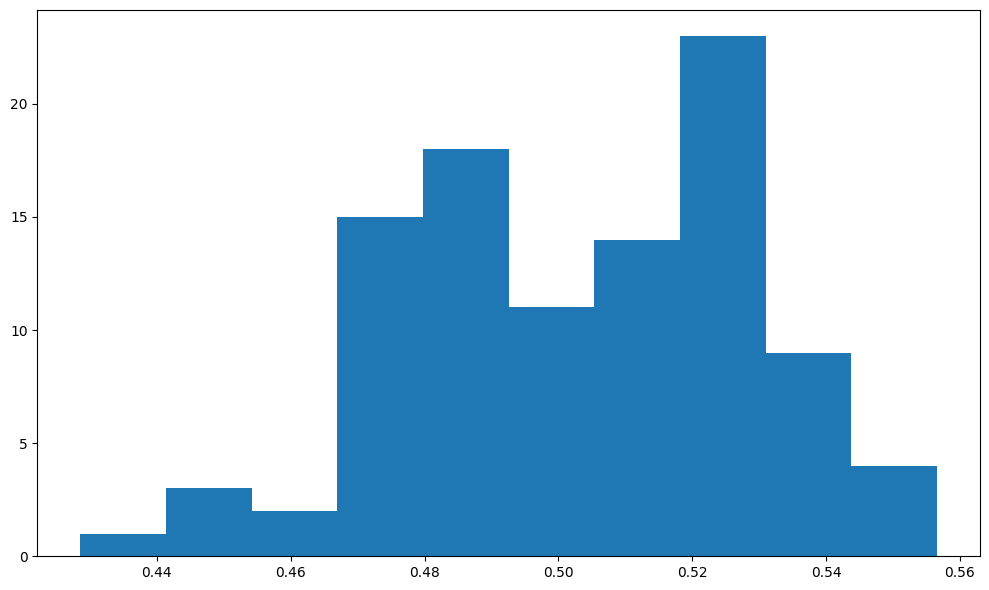

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Кореляція та Зла Бейсбольна Корпорація

Кореляція дозволяє нам знаходити зв’язки між послідовностями даних. У нашому умовному прикладі уявімо, що існує зла бейсбольна корпорація, яка платить своїм гравцям залежно від їхнього зросту — чим вищий гравець, тим більше грошей він/вона отримує. Припустимо, що є базова зарплата у розмірі $1000, а також додаткова премія від $0 до $100, залежно від зросту. Ми візьмемо реальних гравців з MLB і розрахуємо їхні уявні зарплати:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


Давайте тепер обчислимо коваріацію та кореляцію цих послідовностей. `np.cov` надасть нам так звану **коваріаційну матрицю**, яка є розширенням коваріації на кілька змінних. Елемент $M_{ij}$ коваріаційної матриці $M$ є кореляцією між вхідними змінними $X_i$ та $X_j$, а діагональні значення $M_{ii}$ є дисперсією $X_{i}$. Аналогічно, `np.corrcoef` надасть нам **кореляційну матрицю**.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


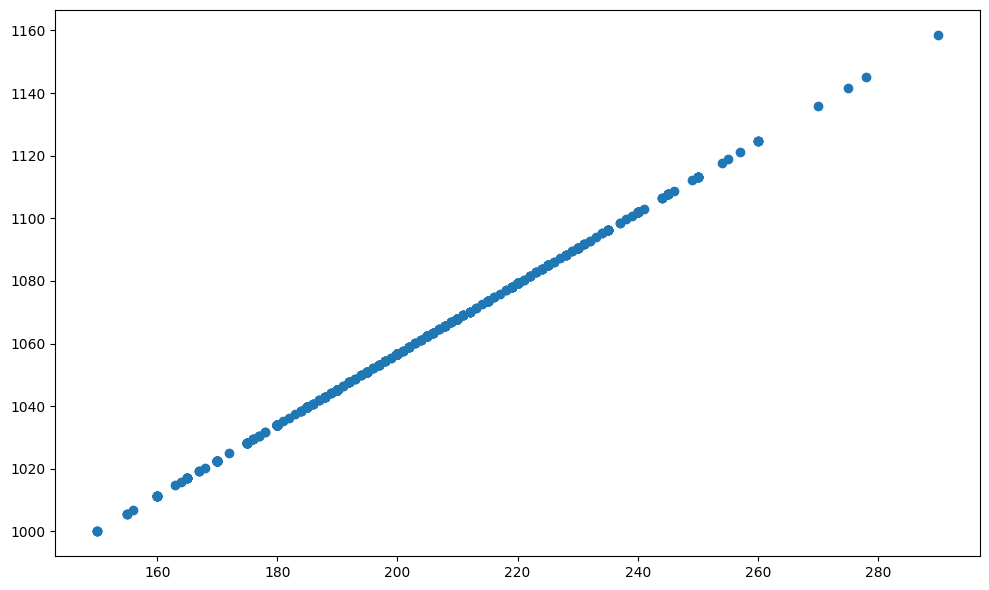

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


У цьому випадку кореляція трохи менша, але все ще досить висока. Тепер, щоб зробити зв'язок ще менш очевидним, ми можемо додати трохи додаткової випадковості, додавши деяку випадкову змінну до зарплати. Давайте подивимося, що станеться:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


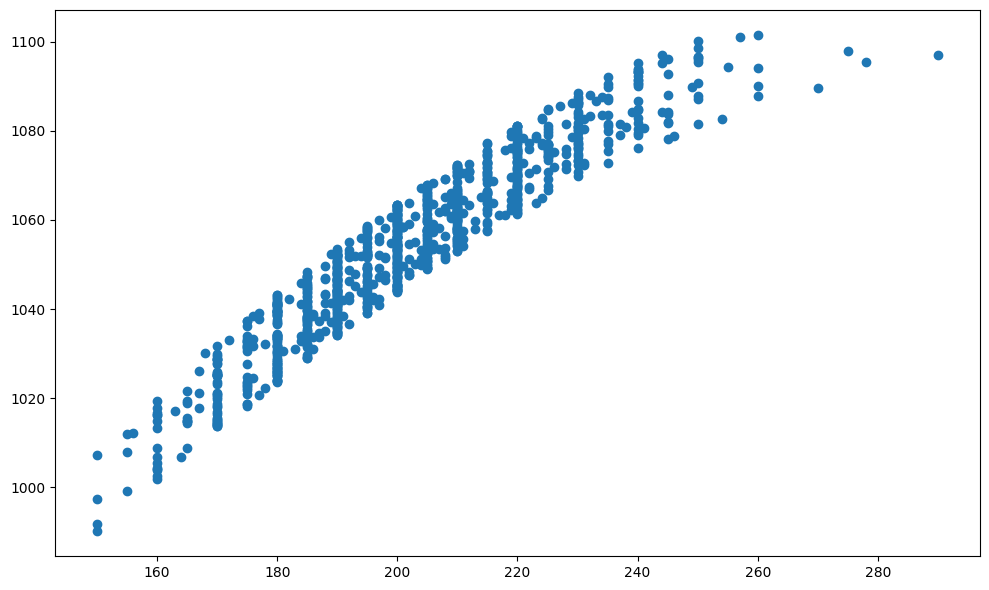

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> Чи можете ви здогадатися, чому точки утворюють вертикальні лінії таким чином?

Ми спостерігали кореляцію між штучно створеною концепцією, такою як зарплата, і спостережуваною змінною *зріст*. Давайте також перевіримо, чи корелюють дві спостережувані змінні, такі як зріст і вага:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

На жаль, ми не отримали жодних результатів — лише деякі дивні значення `nan`. Це пов’язано з тим, що деякі значення в нашій серії є невизначеними, представленими як `nan`, що призводить до того, що результат операції також стає невизначеним. Подивившись на матрицю, ми можемо побачити, що проблемною колонкою є `Weight`, оскільки самокореляція між значеннями `Height` була обчислена.

> Цей приклад демонструє важливість **підготовки даних** та **очищення**. Без належних даних ми не можемо нічого обчислити.

Давайте використаємо метод `fillna`, щоб заповнити відсутні значення, і обчислимо кореляцію:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

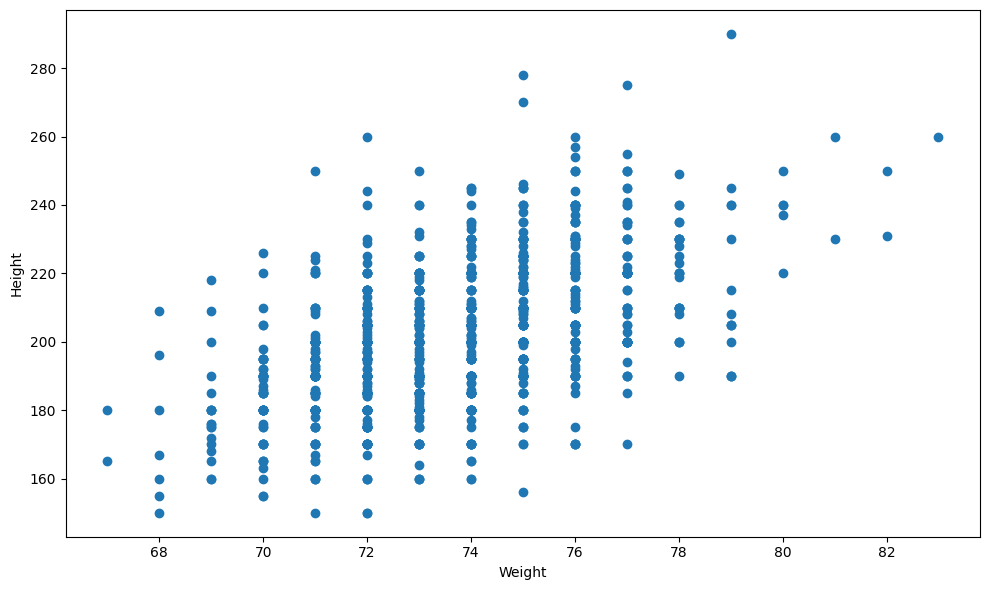

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## Висновок

У цьому нотатнику ми навчилися виконувати базові операції з даними для обчислення статистичних функцій. Тепер ми знаємо, як використовувати надійний апарат математики та статистики для доведення деяких гіпотез, а також як обчислювати довірчі інтервали для довільних змінних на основі вибірки даних.



---

**Відмова від відповідальності**:  
Цей документ було перекладено за допомогою сервісу автоматичного перекладу [Co-op Translator](https://github.com/Azure/co-op-translator). Хоча ми прагнемо до точності, зверніть увагу, що автоматичні переклади можуть містити помилки або неточності. Оригінальний документ мовою оригіналу слід вважати авторитетним джерелом. Для критично важливої інформації рекомендується професійний людський переклад. Ми не несемо відповідальності за будь-які непорозуміння або неправильні тлумачення, що виникли внаслідок використання цього перекладу.
